# 時間處理

在金融中最常遇到的資料類型是「時間」，Python中處理時間的主要工具就是<font color='green'>pandas</font>。pandas的主要作者在大型對沖基金AQR資本管理公司擔任分析師時開始開發這個library

### pandas基礎

In [1]:
import numpy as np
import pandas as pd

pandas中的DataFrame物件設計用來管理具有索引和標籤的數據，跟SQL或execl的工作表內數據非常相似，別且能將之整齊的印出來

In [2]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'], index=['a','b','c','d'])
df

,numbers
a,10
b,20
c,30
d,40


In [3]:
df.index

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [4]:
df.columns

Index([u'numbers'], dtype='object')

In [5]:
df.ix['c'] #透過index取得值

numbers    30
Name: c, dtype: int64

In [6]:
df.ix[['a', 'd']]

,numbers
a,10
d,40


In [7]:
df.ix[df.index[1:3]]

,numbers
b,20
c,30


In [8]:
df.sum()

numbers    100
dtype: int64

In [9]:
df.apply(lambda x: x ** 2)

,numbers
a,100
b,400
c,900
d,1600


也能進行向量操作

In [10]:
df * 2

,numbers
a,20
b,40
c,60
d,80


增加column也是可行的

In [11]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [12]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'], index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


增加一個row

In [13]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'}, ignore_index=True)

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


索引會被簡單索引所代替，所以提供一個正確的索引是比較好的做法

In [14]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75, 'names': 'Henry'}, index = ['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


pandas也能夠處理缺漏的訊息，我們用join再加一個column

In [15]:
df.join(pd.DataFrame([1, 4, 9, 16, 25], index=['a', 'b', 'c', 'd', 'y'], columns=['squares']))

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


沒有y這個索引，所以沒有顯示

In [16]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25], index=['a', 'b', 'c', 'd', 'y'], columns=['squares']), how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


<font color='green'>how='outer'</font>表示使用這個索引值的連集

儘管有丟失的值，但使用大部分的method還是有效

In [17]:
df[['numbers','squares']].mean()

numbers    40.0
squares    11.0
dtype: float64

#### 從現在開始，我們將會處理數值數據

為了生成一個模擬的數據，按照下面的例子，生成一個9*4的標準常態分佈隨機變數

In [18]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[ 0.169146,  0.229777, -0.922404,  1.315962],
       [-0.963603,  0.469992, -0.413386,  0.316677],
       [ 0.342895, -0.273618, -0.286605, -1.690181],
       [ 0.778529,  1.270647, -1.019114, -0.652668],
       [ 0.971154,  1.444132,  1.048759, -0.272556],
       [-0.304299, -0.692528,  0.050356,  0.677506],
       [ 0.347389,  1.976313,  0.470048,  0.895866],
       [-1.67638 , -1.065745,  0.159526, -0.698733],
       [-0.552067,  1.199653, -0.559959, -0.751672]])

轉成DataFrame結構

In [19]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,0.169146,0.229777,-0.922404,1.315962
1,-0.963603,0.469992,-0.413386,0.316677
2,0.342895,-0.273618,-0.286605,-1.690181
3,0.778529,1.270647,-1.019114,-0.652668
4,0.971154,1.444132,1.048759,-0.272556
5,-0.304299,-0.692528,0.050356,0.677506
6,0.347389,1.976313,0.470048,0.895866
7,-1.676380,-1.065745,0.159526,-0.698733
8,-0.552067,1.199653,-0.559959,-0.751672


In [20]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,0.169146,0.229777,-0.922404,1.315962
1,-0.963603,0.469992,-0.413386,0.316677
2,0.342895,-0.273618,-0.286605,-1.690181
3,0.778529,1.270647,-1.019114,-0.652668
4,0.971154,1.444132,1.048759,-0.272556
5,-0.304299,-0.692528,0.050356,0.677506
6,0.347389,1.976313,0.470048,0.895866
7,-1.676380,-1.065745,0.159526,-0.698733
8,-0.552067,1.199653,-0.559959,-0.751672


In [21]:
df['No1'][0]

0.1691462455413752

為了高效率處理金融事件的數據，必須很好地處理時間索引，這也是pandas的重要優勢，例如，假設我們分為剛剛四行的數據集對應於2015年1月開始9個月的月底數據，然後，用date_range生成一個DatetimeIndex物件

In [22]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [23]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,0.169146,0.229777,-0.922404,1.315962
2015-02-28,-0.963603,0.469992,-0.413386,0.316677
2015-03-31,0.342895,-0.273618,-0.286605,-1.690181
2015-04-30,0.778529,1.270647,-1.019114,-0.652668
2015-05-31,0.971154,1.444132,1.048759,-0.272556
2015-06-30,-0.304299,-0.692528,0.050356,0.677506
2015-07-31,0.347389,1.976313,0.470048,0.895866
2015-08-31,-1.676380,-1.065745,0.159526,-0.698733
2015-09-30,-0.552067,1.199653,-0.559959,-0.751672


[date_range函式頻率參數值](http://stackoverflow.com/questions/17001389/pandas-resample-documentation)

#### 基本分析

跟Numpy一樣，我們可以利用DataFrame中的很多便利的內建method，例如sum, mean等等

In [24]:
df.sum()

No1   -0.887237
No2    4.558622
No3   -1.472780
No4   -0.859798
dtype: float64

In [25]:
df.mean()

No1   -0.098582
No2    0.506514
No3   -0.163642
No4   -0.095533
dtype: float64

In [26]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,0.169146,0.229777,-0.922404,1.315962
2015-02-28,-0.794456,0.699768,-1.335790,1.632640
2015-03-31,-0.451562,0.426150,-1.622395,-0.057541
2015-04-30,0.326967,1.696798,-2.641509,-0.710210
2015-05-31,1.298121,3.140930,-1.592750,-0.982766
2015-06-30,0.993821,2.448401,-1.542394,-0.305259
2015-07-31,1.341211,4.424715,-1.072347,0.590607
2015-08-31,-0.335170,3.358969,-0.912821,-0.108126
2015-09-30,-0.887237,4.558622,-1.472780,-0.859798


最強大的還是<font color='red'>describe</font>method，他可以一次顯示多種常用的統計數字

In [27]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.098582,0.506514,-0.163642,-0.095533
std,0.856213,1.042833,0.667441,0.963179
min,-1.676380,-1.065745,-1.019114,-1.690181
25%,-0.552067,-0.273618,-0.559959,-0.698733
50%,0.169146,0.469992,-0.286605,-0.272556
75%,0.347389,1.270647,0.159526,0.677506
max,0.971154,1.976313,1.048759,1.315962


或要繪製圖表，只需要一行程式碼

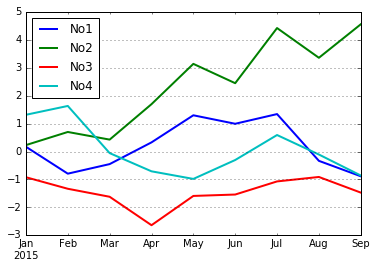

In [28]:
%matplotlib inline
df.cumsum().plot(lw=2.0, grid=True)

### Series物件

目前，我們主要是使用DataFrame

In [29]:
type(df)

pandas.core.frame.DataFrame

但還有一個好用的Series類別，例如，我們從DataFrame物件中選擇單一個column時，我們就會得到一個Series物件

In [30]:
df['No1']

2015-01-31    0.169146
2015-02-28   -0.963603
2015-03-31    0.342895
2015-04-30    0.778529
2015-05-31    0.971154
2015-06-30   -0.304299
2015-07-31    0.347389
2015-08-31   -1.676380
2015-09-30   -0.552067
Freq: M, Name: No1, dtype: float64

In [31]:
type(df['No1'])

pandas.core.series.Series

DataFrame的主要method也可以用在Series，例如，我們想要繪製圖表

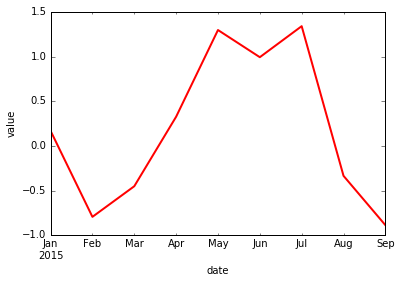

In [32]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2.)
plt.xlabel('date')
plt.ylabel('value')

#### Groupby操作

pandas具有強大的分組功能，方式有點類似SQL，為了分組，我們添加一行，表示數據的季度

In [33]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q3', 'Q2', 'Q4', 'Q3', 'Q2']
df

,No1,No2,No3,No4,Quarter
2015-01-31,0.169146,0.229777,-0.922404,1.315962,Q1
2015-02-28,-0.963603,0.469992,-0.413386,0.316677,Q1
2015-03-31,0.342895,-0.273618,-0.286605,-1.690181,Q1
2015-04-30,0.778529,1.270647,-1.019114,-0.652668,Q2
2015-05-31,0.971154,1.444132,1.048759,-0.272556,Q3
2015-06-30,-0.304299,-0.692528,0.050356,0.677506,Q2
2015-07-31,0.347389,1.976313,0.470048,0.895866,Q4
2015-08-31,-1.676380,-1.065745,0.159526,-0.698733,Q3
2015-09-30,-0.552067,1.199653,-0.559959,-0.751672,Q2


現在，我們根據Quarter分組

In [34]:
groups = df.groupby('Quarter')
groups

In [35]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.150521,0.142050,-0.540798,-0.019180
Q2,-0.025946,0.592591,-0.509573,-0.242278
Q3,-0.352613,0.189193,0.604142,-0.485644
Q4,0.347389,1.976313,0.470048,0.895866


In [36]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.342895,0.469992,-0.286605,1.315962
Q2,0.778529,1.270647,0.050356,0.677506
Q3,0.971154,1.444132,1.048759,-0.272556
Q4,0.347389,1.976313,0.470048,0.895866


In [37]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    2
Q4    1
dtype: int64

分組也可以根據多行分組，為此我們再多加一行，表示索引日期的月份是奇數還是偶數

In [38]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd']

In [39]:
groups = df.groupby(['Quarter', 'Odd_Even'])
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         1
Q4       Odd         1
dtype: int64

In [40]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -0.963603  0.469992 -0.413386  0.316677
        Odd       0.256020 -0.021921 -0.604505 -0.187109
Q2      Even      0.237115  0.289059 -0.484379  0.012419
        Odd      -0.552067  1.199653 -0.559959 -0.751672
Q3      Even     -1.676380 -1.065745  0.159526 -0.698733
        Odd       0.971154  1.444132  1.048759 -0.272556
Q4      Odd       0.347389  1.976313  0.470048  0.895866

### 金融數據

Web提供了許多免費的金融數據，為此，我們將使用pandas內建函數DataReader從[Yahoo財金網站](http://finance.yahoo.com)讀取股價數據，分析數據並產生不同的圖表

In [41]:
import pandas.io.data as web

/Users/andy/anaconda/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


目前pandas支持以下[數據](http://pandas.pydata.org/pandas-docs/stable/remote_data.html)
+ yahoo財經
+ google財經
+ St.Louis FED (FRED)
+ Kenneth French’s data library
+ 世界銀行
+ Google analytics  

例如，我們可以讀取Apple的股價訊息

In [42]:
AAPL = web.DataReader(name='AAPL', data_source='yahoo', start='2000-01-01')

In [43]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4195 entries, 2000-01-03 to 2016-09-02
Data columns (total 6 columns):
Open         4195 non-null float64
High         4195 non-null float64
Low          4195 non-null float64
Close        4195 non-null float64
Volume       4195 non-null int64
Adj Close    4195 non-null float64
dtypes: float64(5), int64(1)
memory usage: 229.4 KB


In [44]:
AAPL.columns

Index([u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close'], dtype='object')

In [45]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,104.874997,112.499998,101.687501,111.937502,133949200,3.660058
2000-01-04,108.250001,110.625002,101.187503,102.500003,128094400,3.351477
2000-01-05,103.749998,110.562497,103.000001,103.999997,194580400,3.400523
2000-01-06,106.124999,106.999999,94.999998,94.999998,191993200,3.106247
2000-01-07,96.499999,101.000002,95.500003,99.500001,115183600,3.253385


In [46]:
AAPL.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-08-29,106.620003,107.440002,106.290001,106.820000,24970300,106.820000
2016-08-30,105.800003,106.500000,105.500000,106.000000,24863900,106.000000
2016-08-31,105.660004,106.570000,105.639999,106.099998,29662400,106.099998
2016-09-01,106.139999,106.800003,105.620003,106.730003,26701500,106.730003
2016-09-02,107.699997,108.000000,106.820000,107.730003,26334900,107.730003


我們用plot生成一個圖表

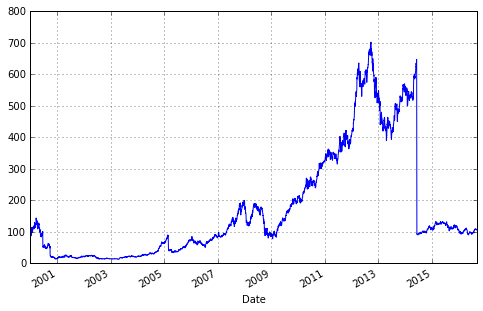

In [47]:
AAPL['Close'].plot(figsize=(8, 5), grid=True)

首先，我們先計算出收益率，我們可以使用shift方法，他可以相對於索引移動Series或整個Dataframe物件

In [49]:
%time AAPL['Return'] = np.log(AAPL['Close'] / AAPL['Close'].shift(1))

CPU times: user 41.9 ms, sys: 402 µs, total: 42.3 ms
Wall time: 48 ms


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10a357f10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10a3c6ed0>], dtype=object)

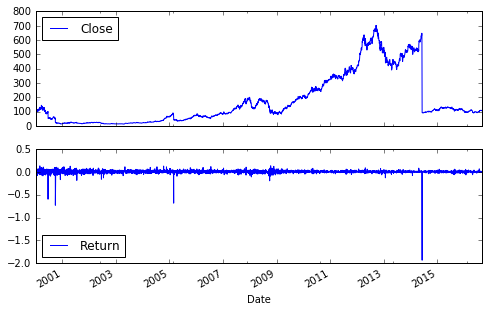

In [51]:
AAPL[['Close', 'Return']].plot(subplots=True, style='b', figsize=(8, 5))

可以看到股票都是漲很少，跌很快ＱＱ

波動率對期權交易者特別重要，而股票交易者可能對移動平均數(趨勢)更感興趣，移動平均數很容易用pandas的rolling_mean函數計算，以及其他一些“滾動”函數

In [59]:
AAPL['42d'] = AAPL['Close'].rolling(window=42).mean()
AAPL['252d'] = AAPL['Close'].rolling(window=252).mean()

In [60]:
AAPL[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2016-08-29,106.820000,103.117381,105.050159
2016-08-30,106.000000,103.365000,105.023333
2016-08-31,106.099998,103.608096,105.016905
2016-09-01,106.730003,103.887619,104.994643
2016-09-02,107.730003,104.178096,104.984167


包含兩種趨勢的典型股價圖表

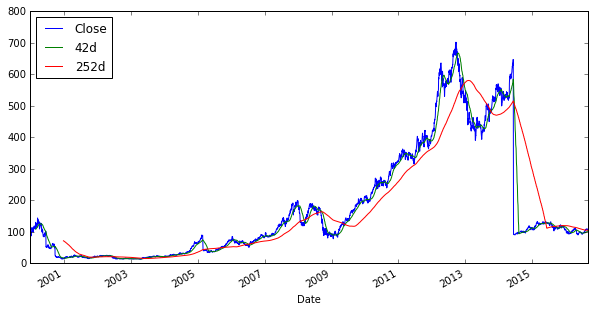

In [61]:
AAPL[['Close', '42d', '252d']].plot(figsize=(10, 5))

移動歷史標準差，也就是移動歷史波動率

In [62]:
import math
AAPL['Mov_Vol'] = AAPL['Return'].rolling(window=252).std() * math.sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10a7a3f90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10a953110>], dtype=object)

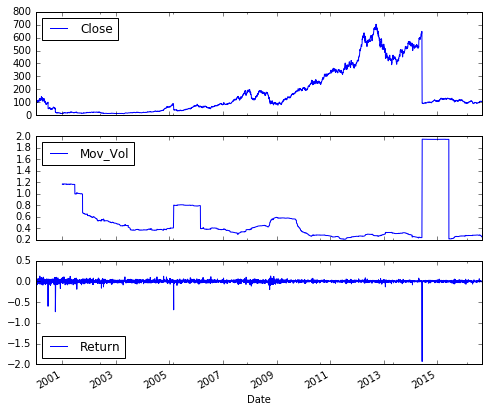

In [63]:
AAPL[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b', figsize=(8, 7))

### 回歸分析

目前，我們提供的支持僅基於對金融數據圖表的檢驗。使用pandas，還可以再更正式的統計學基礎上進行這類分析，最簡單的方法是使用「普通最小二乘回歸(OLS)方法」

下面，使用網路上可以取得的兩個不同數據進行分析
+ EURO STOXX 50
+ VSTOXX  

我從幾個操作開始

In [64]:
from urllib import urlretrieve

我們從Web上讀取文件，並將其保存到data資料夾中

In [65]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_calues/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')

('./data/vs.txt', <httplib.HTTPMessage instance at 0x10a3295f0>)

使用pandas直接讀取數據不是最好的途徑，最好還是是先進行一些數據清理